# Polynomial Regression, and Evaluation using R-Squared, MAPE and MAE

<mark>Goal</mark>: The goal is to build a model that can guess how likely someone is to develop more serious diabetes. We're focusing on a feature-BMI, which tells us about a person's weight compared to their height. Doctors can use this tool to identify patients who might be at higher risk of worsening diabetes.

Source of the dataset used to build this tools : [clickhere](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes

In [2]:
X, y = load_diabetes(return_X_y=True, as_frame=True)

print(len(X))
print(len(y))

442
442


In [3]:
print(load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
# Number of Attributes: First 10 columns are numeric predictive values
X.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
# Target value are stored in y
# Target: Column 11 is a quantitative measure of disease progression one year after baseline
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [6]:
combined_var = pd.concat([X,y] , axis=1)
combined_var.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of `n_samples` (i.e. the sum of squares of each column totals 1)

In [7]:
#this gives the information about the data types,columns, null value counts, memory usage
combined_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


# Histogram SEX VS BMI

Text(0.5, 0.98, 'Distribution of BMI by Gender')

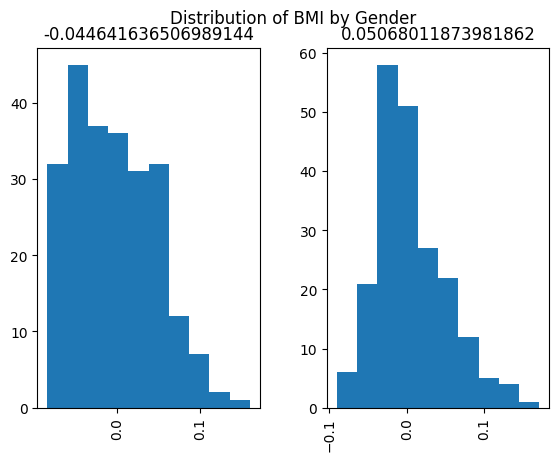

In [8]:
combined_var.hist(column="bmi" , by= "sex")
plt.suptitle("Distribution of BMI by Gender")

Looking at the two histogram we have ploted, they're separated by gender. However, it is not obvious which one is for males and which one is for females. So, we cannot just rely on our gut feeling. That means we cannot use the connection between BMI and gender for our analysis.

# Histogram BMI VS AGE

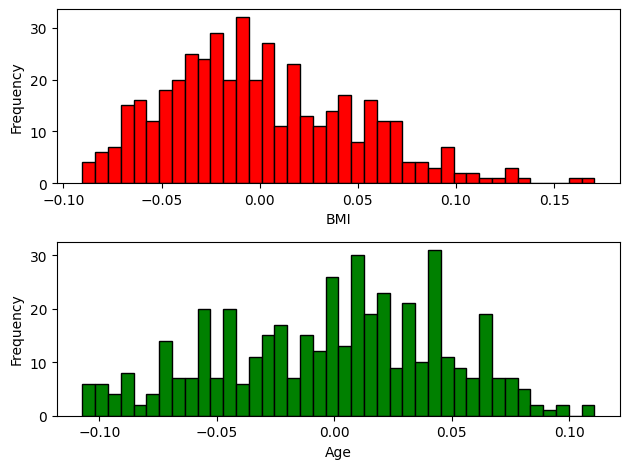

In [9]:

plt.subplot(2, 1, 1) 
plt.hist(combined_var["bmi"], bins=40, color='red', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)  
plt.hist(combined_var["age"], bins=40, color='green', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout() 

plt.show()

We notice that the scaled age values are evenly distributed between -0.5 and 0.5, indicating that they are centered around 0. This  result of scaling techniques like standardization, which helps us to create a more balanced and standardized representation of the age feature.

# Corelation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

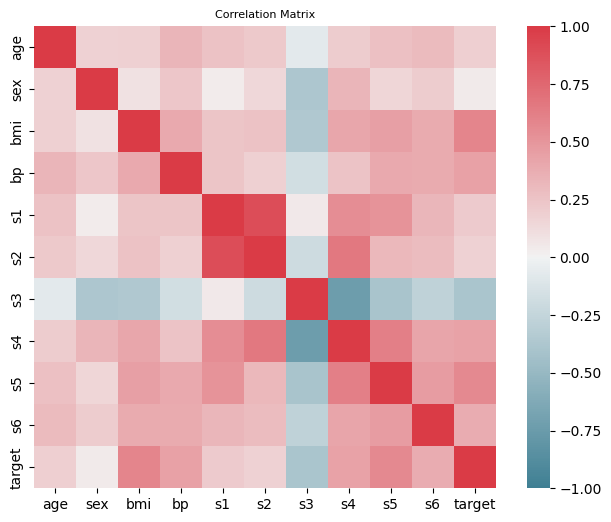

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
corr = combined_var.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
plt.title('Correlation Matrix', fontsize=8)

Looking at our data, we notice that both S1 and S2 tend to go up together, indicating they are positively correlated. This suggests that having both might be unnecessary since they convey similar information. Additionally, when we look at S3 and S4, we see a strong relationship between them and their correlation value is close to -1. This means that as one of them increases, the other tends to decrease.

# Data cleaning

In [11]:

count = 0

for column_name, column_values in combined_var.items():
    if combined_var[column_name].isnull().any():
        count += 1
        print(f"Yes, there are null values in column {column_name}")

print(f"{count} Null Values present")

combined_var.isnull().sum()


0 Null Values present


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

There are no null value in our data set so we do not require to filter or clean our data

# Spilting Data

In [12]:
from matplotlib import pyplot as plt
import numpy as np
from typing import List
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [13]:
def create_data_sactter_plot(X, y):
    fig, ax = plt.subplots()
    ax.scatter(X, y)
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_title('Data')
    return fig, ax

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True, as_frame=True)
X = X["bmi"]

X = X.values.reshape(-1, 1) if isinstance(X, pd.Series) else X.reshape(-1, 1)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def create_polynomial_model(degree, X, y):
    
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    return model, X_poly




In [15]:
degree = 3
model, X_train = create_polynomial_model(degree, X_train, y_train)

print("Model Coefficients:", model.coef_)


Model Coefficients: [ 962.01477003  923.71377466 -607.50392457]


In [16]:
print(f"X shape: {X.shape}")
print(f"x_train shape: {X_train.shape}")
print(f"First 5 rows of X:")
print(X[:5])
print(f"First 5 rows of x_tarin:")
print(X_train[:5])

X shape: (442, 1)
x_train shape: (309, 3)
First 5 rows of X:
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]
First 5 rows of x_tarin:
[[ 3.25952805e-02  1.06245231e-03  3.46309312e-05]
 [ 8.54080721e-02  7.29453879e-03  6.23012495e-04]
 [-1.05172024e-02  1.10611547e-04 -1.16332403e-06]
 [ 1.10197750e-01  1.21435441e-02  1.33819123e-03]
 [-6.20595414e-03  3.85138667e-05 -2.39015291e-07]]


# Importing LinearRegression

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
def print_model_stats(model):
    
    if isinstance(model, Pipeline):
        linear_model = model.named_steps['linear']
    else:
        linear_model = model

    print(f'Model: {linear_model}')
    print(f'Coefficients: {linear_model.coef_}')
    print(f'Intercept: {linear_model.intercept_}')

    equation = f"y = {linear_model.intercept_:.2f}"
    for i, coef in enumerate(linear_model.coef_):
        equation += f" + {coef:.2f} * X^{i+1}"
    print(f'Equation: {equation}')

print_model_stats(model)

Model: LinearRegression()
Coefficients: [ 962.01477003  923.71377466 -607.50392457]
Intercept: 149.03494941602185
Equation: y = 149.03 + 962.01 * X^1 + 923.71 * X^2 + -607.50 * X^3


# Importing Pipeline function to compare different Models

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


X_reshaped = X.values.reshape(-1, 1) if isinstance(X, pd.Series) else X.reshape(-1, 1)


model = Pipeline([
    ('polynomial', PolynomialFeatures(degree=1)), 
    ('linear', LinearRegression())
])


model.fit(X_reshaped, y)
    

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('linear', LinearRegression())])

In [20]:
def print_pipeline_model_stats(model, deg):
    
    linear_model = model.named_steps['linear']
    poly_features = model.named_steps['polynomial']

    
    print(f'\nDegree {deg}')
    print(f'Coefficients: {linear_model.coef_}')
    print(f'Intercept: {linear_model.intercept_}')

    
    equation = f"y = {linear_model.intercept_:.2f}" + ''.join([f" + {coef:.2f} * X^{i+1}" for i, coef in enumerate(linear_model.coef_)])
    print(f'Equation: {equation}\n')



In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_model(X, y, model):
    
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=["bmi"])

    
    X_bmi = X["bmi"].values

    
    X_bmi = np.asarray(X_bmi).reshape(-1, 1)
    y = np.asarray(y)

    
    y_pred = model.predict(X_bmi)

    
    plt.scatter(X_bmi, y, color='blue', label='Data')

    
    plt.plot(X_bmi, y_pred, color='red', label='Model Fit')

    plt.xlabel('BMI')
    plt.ylabel('Disease Progression')
    plt.title('Model Fit')
    plt.legend()
    plt.show()



In [22]:
def create_polynomial_models(X: np.ndarray, y: np.ndarray, degrees: List[int]) -> dict[int, np.poly1d]:


    models = {}
    for degree in degrees:
        model = Pipeline([('polynomial', PolynomialFeatures(degree=degree)),
                          ('linear', LinearRegression())])
        model.fit(X, y)
        models[degree] = model
    return models

In [23]:

X_reshaped = X.values.reshape(-1, 1) if isinstance(X, pd.Series) else X.reshape(-1, 1)

degrees = list(range(0, 6))
models = create_polynomial_models(X_reshaped, y, degrees)

In [24]:
models

{0: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=0)),
                 ('linear', LinearRegression())]),
 1: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                 ('linear', LinearRegression())]),
 2: Pipeline(steps=[('polynomial', PolynomialFeatures()),
                 ('linear', LinearRegression())]),
 3: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())]),
 4: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=4)),
                 ('linear', LinearRegression())]),
 5: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=5)),
                 ('linear', LinearRegression())])}

In [25]:
for degree, model in models.items():
    print_pipeline_model_stats(model,degree)
    


Degree 0
Coefficients: [0.]
Intercept: 152.13348416289594
Equation: y = 152.13 + 0.00 * X^1


Degree 1
Coefficients: [  0.         949.43526038]
Intercept: 152.13348416289617
Equation: y = 152.13 + 0.00 * X^1 + 949.44 * X^2


Degree 2
Coefficients: [  0.         941.14735549 292.29718785]
Intercept: 151.47217830803305
Equation: y = 151.47 + 0.00 * X^1 + 941.15 * X^2 + 292.30 * X^3


Degree 3
Coefficients: [     0.            998.03770648   1151.09631092 -11656.81091408]
Intercept: 150.27698033847415
Equation: y = 150.28 + 0.00 * X^1 + 998.04 * X^2 + 1151.10 * X^3 + -11656.81 * X^4


Degree 4
Coefficients: [     0.           1055.27334075    412.54705785 -25895.11668062
 114576.32207001]
Intercept: 151.05466918919728
Equation: y = 151.05 + 0.00 * X^1 + 1055.27 * X^2 + 412.55 * X^3 + -25895.12 * X^4 + 114576.32 * X^5


Degree 5
Coefficients: [ 0.00000000e+00  1.02080014e+03 -4.91285995e+03  6.74463889e+02
  9.14675811e+05 -4.76181710e+06]
Intercept: 154.70069145700364
Equation: y = 154.


Metrics for Model 0 on Training dataset:
R-squared: -0.0005
MAE: 66.5135
MAPE: 0.6290


Metrics for Model 0 on Validation dataset:
R-squared: -0.0042
MAE: 61.7212
MAPE: 0.5708


Metrics for Model 1 on Training dataset:
R-squared: 0.3650
MAE: 52.2406
MAPE: 0.4904


Metrics for Model 1 on Validation dataset:
R-squared: 0.3089
MAE: 48.2716
MAPE: 0.4252


Metrics for Model 2 on Training dataset:
R-squared: 0.3657
MAE: 52.1998
MAPE: 0.4901


Metrics for Model 2 on Validation dataset:
R-squared: 0.3070
MAE: 48.2731
MAPE: 0.4246


Metrics for Model 3 on Training dataset:
R-squared: 0.3651
MAE: 52.0848
MAPE: 0.4880


Metrics for Model 3 on Validation dataset:
R-squared: 0.3165
MAE: 47.5484
MAPE: 0.4195


Metrics for Model 4 on Training dataset:
R-squared: 0.3659
MAE: 52.0591
MAPE: 0.4870


Metrics for Model 4 on Validation dataset:
R-squared: 0.3108
MAE: 47.5173
MAPE: 0.4174


Metrics for Model 5 on Training dataset:
R-squared: 0.3682
MAE: 52.0659
MAPE: 0.4868


Metrics for Model 5 on Validat

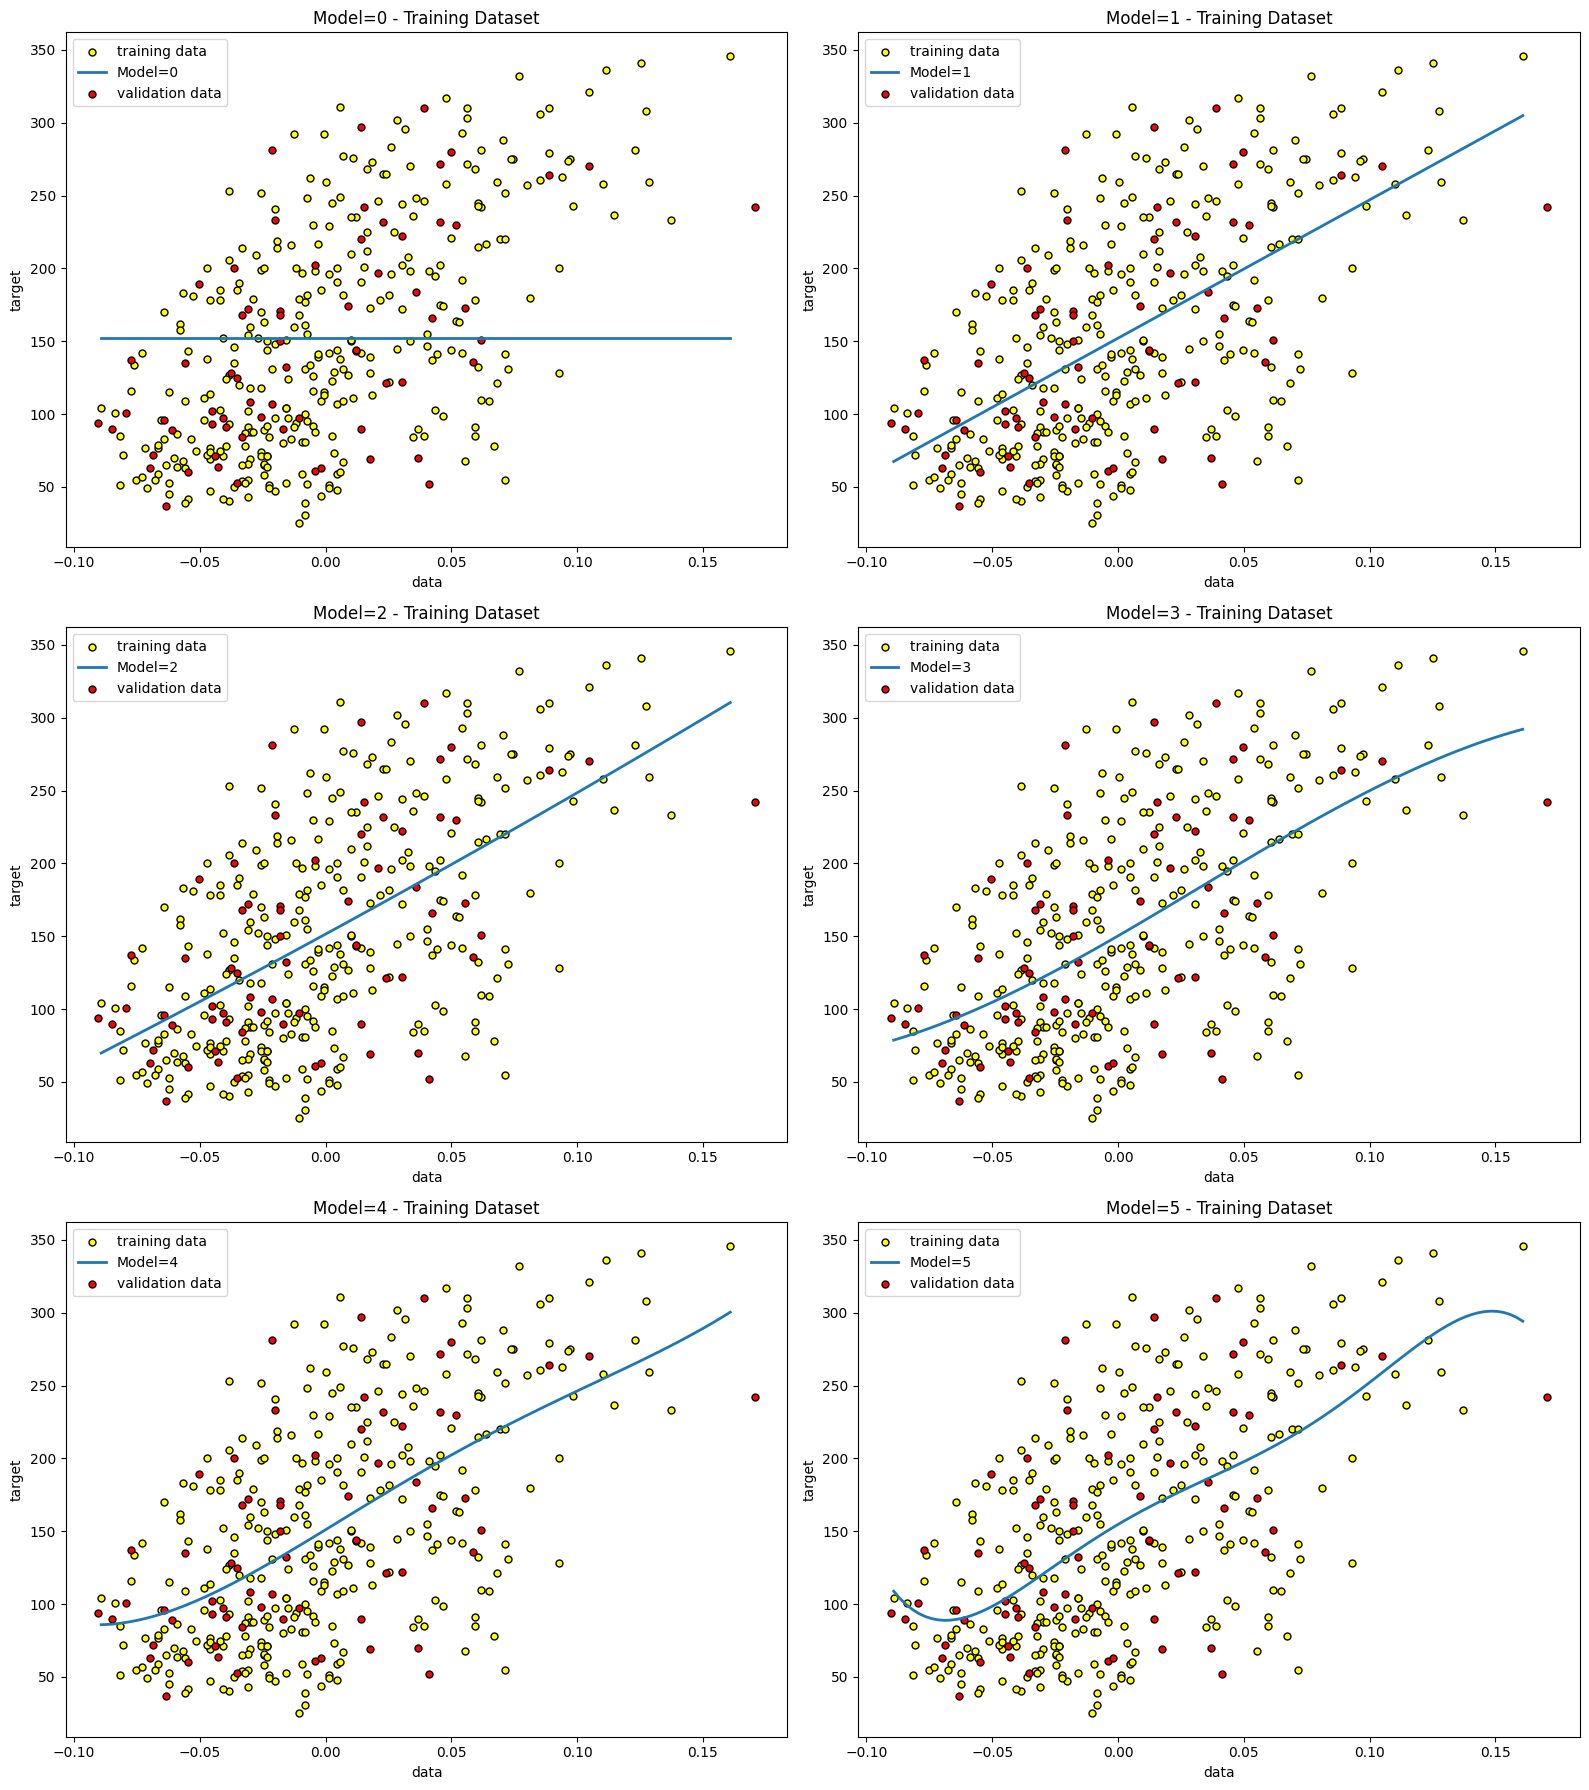

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def print_model_metrics(y_true, y_pred, dataset_name, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    
    print(f'\nMetrics for Model {model_name} on {dataset_name} dataset:')
    print(f'R-squared: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MAPE: {mape:.4f}\n')

def plot_multiple_models(X_train, y_train, X_val, y_val, models):
    X_continuous = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)
    
    num_models = len(models)
    num_cols = min(num_models, 2)  
    num_rows = (num_models + num_cols - 1) // num_cols  
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 8, num_rows * 6))
    
    for idx, (name, model) in enumerate(models.items()):
        row_idx = idx // num_cols 
        col_idx = idx % num_cols  
        
       
        axs[row_idx, col_idx].scatter(X_train, y_train, s=25, edgecolor="black", c="yellow", label="training data")
        axs[row_idx, col_idx].plot(X_continuous, model.predict(X_continuous), label=f"Model={name}", linewidth=2)
        axs[row_idx, col_idx].set_xlabel("data")
        axs[row_idx, col_idx].set_ylabel("target")
        axs[row_idx, col_idx].set_title(f"Model={name} - Training Dataset")
        axs[row_idx, col_idx].legend()

       
        y_train_pred = model.predict(np.array(X_train).reshape(-1, 1))  
        print_model_metrics(y_train, y_train_pred, 'Training', name)
        
       
        axs[row_idx, col_idx].scatter(X_val, y_val, s=25, edgecolor="black", c="red", label="validation data")
        axs[row_idx, col_idx].legend()

        
        y_val_pred = model.predict(np.array(X_val).reshape(-1, 1))  
        print_model_metrics(y_val, y_val_pred, 'Validation', name)
    
    plt.tight_layout()
    plt.show()


plot_multiple_models(X_train, y_train, X_val, y_val, models)


In [27]:
def evaluate_models(X_val, y_val, models):
    best_model = None
    best_error = float('inf')  
    
    for name, model in models.items():
       
        y_val_pred = model.predict(np.array(X_val).reshape(-1, 1))
        
        
        mae = mean_absolute_error(y_val, y_val_pred)
        
        
        if mae < best_error:
            best_model = model
            best_error = mae
    
    return best_model

best_model = evaluate_models(X_val, y_val, models)
print("Best Model:", best_model)


Best Model: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=5)),
                ('linear', LinearRegression())])


Reason For Picking best Model :

I've tested six models using important measures. R-squared tells us how well the model fits the data, and we want higher values. Mean Absolute Error (MAE) shows how close predictions are to real values, with lower numbers being better. Mean Absolute Percentage Error (MAPE) measures accuracy in percentage terms. After looking at these metrics for each model, Model 5 shines. It has a high R-squared, low MAE, and low MAPE, meaning it fits well with dataset , predicts accurately, and maintains good accuracy on both training and validation data. So, Model 5 is my top choice for making predictions on diabete data set provided by professor Ran.

# Running Chosen Model On Test Set

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_test_pred = best_model.predict(np.array(X_test).reshape(-1, 1))

r_squared = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

print("Test Set Evaluation:")
print(f"R-Squared: {r_squared:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


Test Set Evaluation:
R-Squared: 0.2694
MSE: 4148.4650
MAE: 52.5915


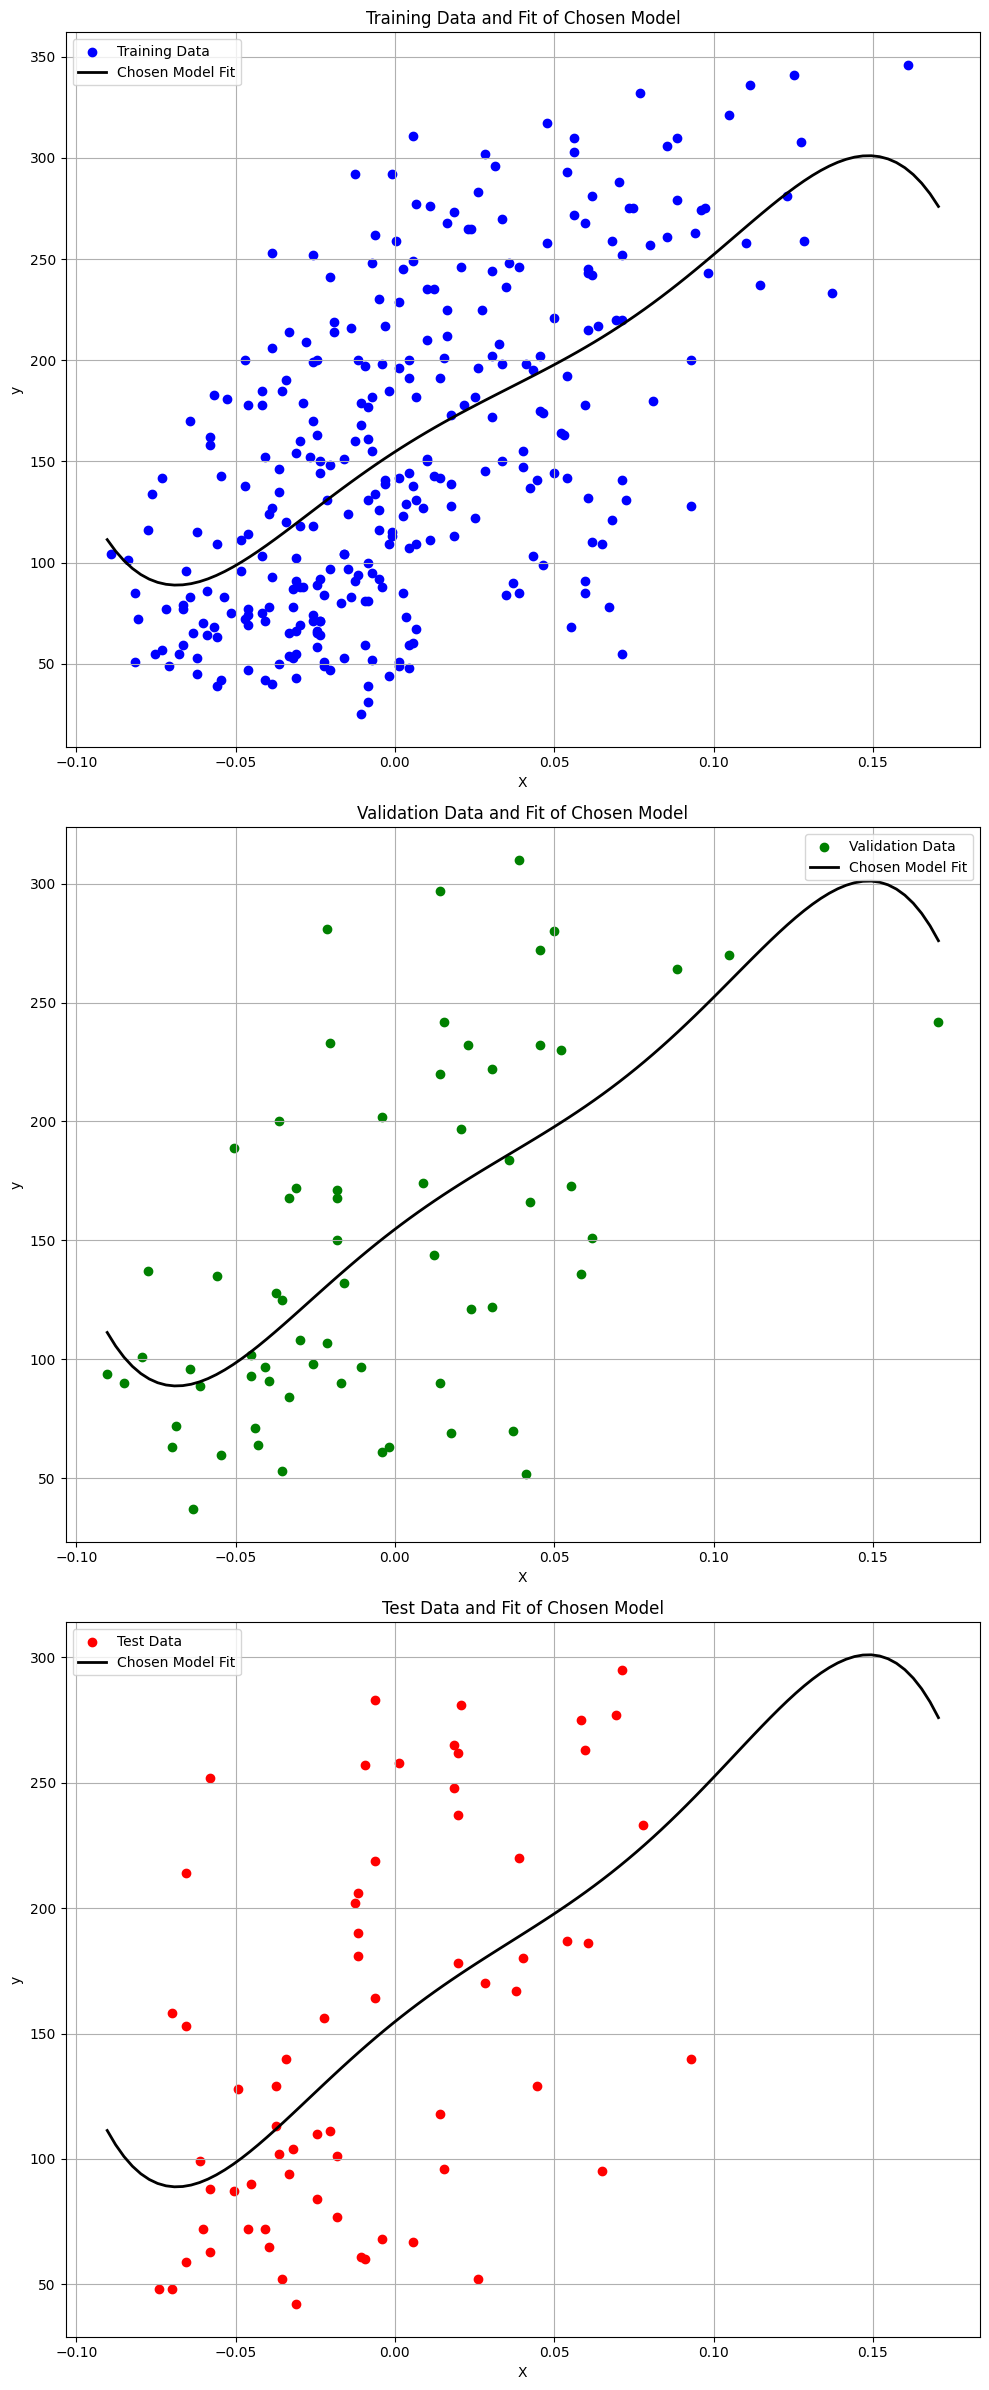

In [29]:
fig, axes = plt.subplots(3, 1, figsize=(10, 24))
X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)

axes[0].scatter(X_train, y_train, color='blue', label='Training Data')
axes[0].plot(X_range, best_model.predict(X_range), color='black', linewidth=2, label='Chosen Model Fit')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')
axes[0].set_title('Training Data and Fit of Chosen Model')
axes[0].legend()
axes[0].grid(True)

axes[1].scatter(X_val, y_val, color='green', label='Validation Data')
axes[1].plot(X_range, best_model.predict(X_range), color='black', linewidth=2, label='Chosen Model Fit')
axes[1].set_xlabel('X')
axes[1].set_ylabel('y')
axes[1].set_title('Validation Data and Fit of Chosen Model')
axes[1].legend()
axes[1].grid(True)

axes[2].scatter(X_test, y_test, color='red', label='Test Data')
axes[2].plot(X_range, best_model.predict(X_range), color='black', linewidth=2, label='Chosen Model Fit')
axes[2].set_xlabel('X')
axes[2].set_ylabel('y')
axes[2].set_title('Test Data and Fit of Chosen Model')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()


In [30]:
print_model_stats(best_model)

Model: LinearRegression()
Coefficients: [ 0.00000000e+00  1.02080014e+03 -4.91285995e+03  6.74463889e+02
  9.14675811e+05 -4.76181710e+06]
Intercept: 154.70069145700364
Equation: y = 154.70 + 0.00 * X^1 + 1020.80 * X^2 + -4912.86 * X^3 + 674.46 * X^4 + 914675.81 * X^5 + -4761817.10 * X^6


# Model Prediction

In [31]:

linear_model = best_model.named_steps['linear']
intercept = linear_model.intercept_
coefficients = linear_model.coef_

bmi_value = 1

manual_prediction = intercept + sum(coef * (bmi_value ** (i + 1)) for i, coef in enumerate(coefficients))

model_prediction = best_model.predict([[bmi_value]])[0]

print(f"Manual Prediction: {manual_prediction:.2f}")
print(f"Model Prediction: {model_prediction:.2f}")

Manual Prediction: -3850204.18
Model Prediction: -3850204.18


A significant variation in predictions in the  instances where the manual prediction shows a notably negative value. This disparity in predictions stems from the model being trained on downscaled BMI values. To improve predictions, a thorough examination of the data and training methodology is essential. Scaling the dataset back to its original values is crucial for ensuring accurate predictions across all BMI ranges." That is why i chose this model is better for best prection.

In [32]:
def count_trainable_parameters(pipeline):
    num_parameters = 0
    for step_name, step_object in pipeline.named_steps.items():
        if hasattr(step_object, 'coef_'):  
            num_parameters += step_object.coef_.shape[0] 
            num_parameters += 1 
    return num_parameters

trainable_parameters = {}

for name, pipeline in models.items():
    num_parameters = count_trainable_parameters(pipeline)
    trainable_parameters[name] = num_parameters

for name, num_parameters in trainable_parameters.items():
    print(f"Model: {name}, Trainable Parameters: {num_parameters}")


Model: 0, Trainable Parameters: 2
Model: 1, Trainable Parameters: 3
Model: 2, Trainable Parameters: 4
Model: 3, Trainable Parameters: 5
Model: 4, Trainable Parameters: 6
Model: 5, Trainable Parameters: 7
